Text(0,0.5,'spike_wave')

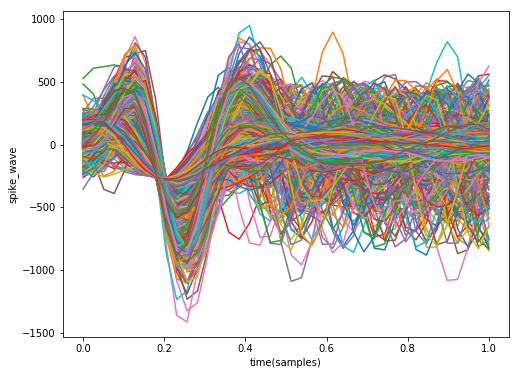

In [2]:
#this is the code for t2 1)
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt

M_wave = loadmat("spikewave.mat")
wave = M_wave['wave']
m,n=np.shape(wave)
x=np.linspace(0,1,40)
fig = plt.figure(1, figsize=(8, 6))
for i in range(n):
    vec=wave[:,i]
    plt.plot(x,vec)
plt.xlabel("time(samples)")
plt.ylabel("spike_wave")

# T2-1

## 说明

以采样点序号为横坐标，直接作图

## 分析

从波峰波谷的位置和其峰谷值来看，这些波形至少可以明显地分为两类

一类起伏波动不大，一类波动很剧烈。当然，因为波形重叠非常严重，可能有更多类别。

D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


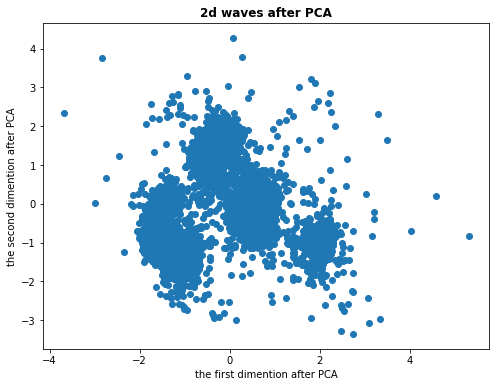

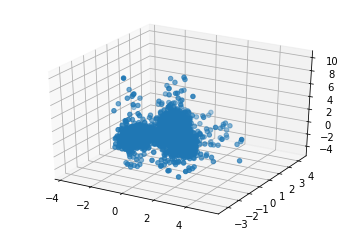

In [4]:
#this is the code for t2 2)
from scipy.io import loadmat
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt

M_wave = loadmat("spikewave.mat")
wave = M_wave['wave'].T
m,n=np.shape(wave)

#下面将其压缩到二维
pca = PCA(n_components=2, svd_solver='randomized',
          whiten=True).fit(wave)
wave_2d = pca.transform(wave)
fig = plt.figure(1, figsize=(8, 6))
plt.title('2d waves after PCA',fontsize='large',fontweight='bold')
plt.scatter(wave_2d[:,0],wave_2d[:,1])
plt.xlabel("the first dimention after PCA")
plt.ylabel("the second dimention after PCA")

#下面将数据压缩到三维
pca = PCA(n_components=3, svd_solver='randomized',
          whiten=True).fit(wave)
wave_3d = pca.transform(wave)
fig = plt.figure(2)
plt.title('3d waves after PCA',fontsize='large',fontweight='bold')
ax1 = plt.axes(projection='3d')
ax1.scatter3D(wave_3d[:,0],wave_3d[:,1],wave_3d[:,2])

# T2-2

如图所示，展示了PCA将spike数据分别降到2维和3维空间的结果

2维空间明显可见信号可分为4或5类，3维因为视角问题看不出明显的分类。

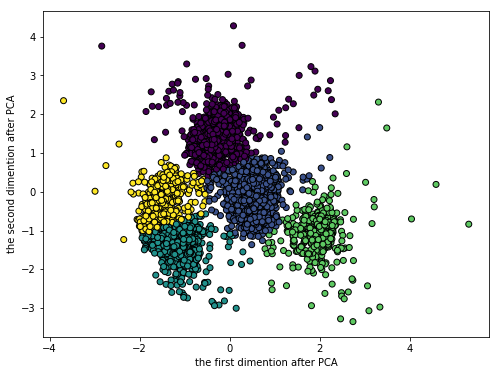

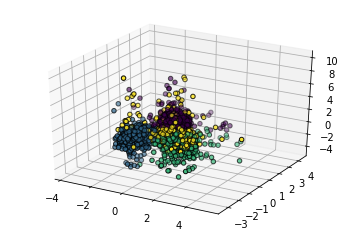

In [6]:
#this is the code for t2 3)
from scipy.io import loadmat
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans




import numpy as np
import matplotlib.pyplot as plt

M_wave = loadmat("spikewave.mat")
wave = M_wave['wave'].T
m,n=np.shape(wave)

#下面将其压缩到二维
pca = PCA(n_components=2, svd_solver='randomized',
          whiten=True).fit(wave)
wave_2d = pca.transform(wave)

model = KMeans(n_clusters=5)
model.fit(wave_2d)
wave_2d_label=model.predict(wave_2d)

fig = plt.figure(1, figsize=(8, 6))
plt.scatter(wave_2d[:, 0], wave_2d[:, 1], c=wave_2d_label, 
                    edgecolor='k')
plt.xlabel("the first dimention after PCA")
plt.ylabel("the second dimention after PCA")

#下面将数据压缩到三维
pca = PCA(n_components=3, svd_solver='randomized',
          whiten=True).fit(wave)
wave_3d = pca.transform(wave)

model = KMeans(n_clusters=4)
model.fit(wave_3d)
wave_3d_label=model.predict(wave_3d)

fig = plt.figure(2)
ax1 = plt.axes(projection='3d')
ax1.scatter3D(wave_3d[:, 0], wave_3d[:, 1],wave_3d[:,2], c=wave_3d_label, 
                    edgecolor='k')

# T2-3

## 2维结果分析（4/5分类）

从二维角度来看，似乎是5类，尽管5类中左边两类有非常勉强的分界线，但是我试过4类的结果，看起来更加糟糕。

## 3维结果分析（5分类）

但是从三维的结果来看，如果分成4类，会出现一类中有一半的点分得非常散乱（说明很可能是另一类）。故而三维的结果可以确定分成五类

Text(0,0.5,'spike_wave')

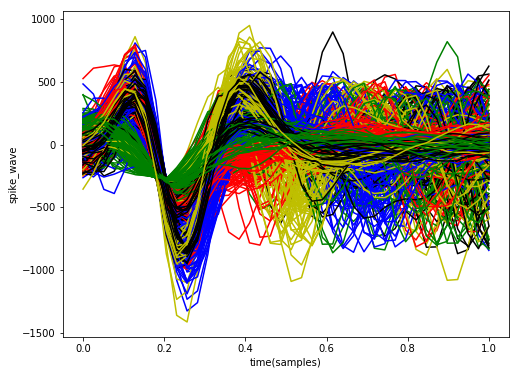

In [8]:
#this is the code for t2 4)
from scipy.io import loadmat
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans




import numpy as np
import matplotlib.pyplot as plt

M_wave = loadmat("spikewave.mat")
wave = M_wave['wave'].T
m,n=np.shape(wave)

#下面将数据压缩到三维
pca = PCA(n_components=3, svd_solver='randomized',
          whiten=True).fit(wave)
wave_3d = pca.transform(wave)

model = KMeans(n_clusters=5)
model.fit(wave_3d)
wave_3d_label=model.predict(wave_3d)

#根据三维压缩的结果展示分类
x=np.linspace(0,1,40)
fig = plt.figure(1, figsize=(8, 6))
color = ['r','g','b','k','y']
for i in range(m):
    vec=wave[i,:]
    plt.plot(x,vec, color=color[wave_3d_label[i]])
plt.xlabel("time(samples)")
plt.ylabel("spike_wave")


# T2-4

## 说明

由于三维的结果更加可信，使用压缩到三维后观察的5分类进行作图。五类分别用红、黄、蓝、绿、黑代表。

## 分析

仔细观察可知：

### 类间差异：

1. 第一波峰的幅度（比如说绿色很小，明显区别）
2. 第二波峰的幅度（红色非常小，明显区别于其他颜色）
3. 第一波谷的幅度（黄蓝色明显区别于其他颜色）
4. 第二波谷的位置（黄色最先到来，蓝色要滞后一点）
5. 剩下的就是黑色了，这也说明5个分类可能确实有点勉强，也许会是4种，当然也有可能更多

### 类内差异：

1. 集中表现在后半段的幅度和相位上，可能后面的采样噪声比较大或者失真严重，当然也有可能是本身的性质决定的（同类放电随时间区别愈发明显）
2. 前几个波峰和波谷的幅度有差异，不过前几个看起来类内相位基本一致